In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Importing required Libraries
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
import cv2
from PIL import Image
from multiprocessing import Pool
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow import keras

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

# Defining the input model
input_shape = (64, 64, 1)

# Defining the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(8, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# Compiling the model with Adam Optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#Printing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

In [9]:
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        '/content/drive/MyDrive/Group_Project_Data/Train',
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=32,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        '/content/drive/MyDrive/Group_Project_Data/Valid',
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=32,
        class_mode='binary')


Found 6090 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
# Defining early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    verbose=1,             
    restore_best_weights=True 
)

Epoch 1/10
187/187 [==============================] - 991s 5s/step - loss: 0.1116 - accuracy: 0.9491 - val_loss: 0.0056 - val_accuracy: 0.9985
Epoch 2/10
187/187 [==============================] - 18s 94ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 3/10
187/187 [==============================] - 13s 69ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0077 - val_accuracy: 0.9975
Epoch 4/10
187/187 [==============================] - 15s 80ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0073 - val_accuracy: 0.9970
Epoch 5/10
187/187 [==============================] - 13s 69ms/step - loss: 0.0028 - accuracy: 0.9988 - val_loss: 0.0018 - val_accuracy: 0.9990
Epoch 6/10
187/187 [==============================] - 13s 69ms/step - loss: 0.0029 - accuracy: 0.9988 - val_loss: 0.0135 - val_accuracy: 0.9970
Epoch 7/10
187/187 [==============================] - 13s 69ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0130 - val_accuracy: 

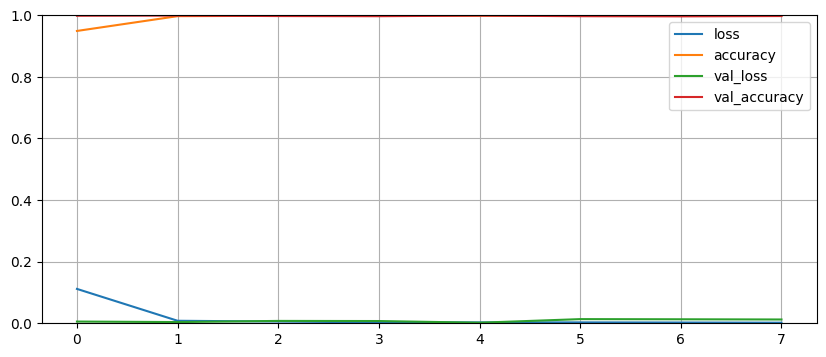

In [11]:
# Training the model
history = model.fit(
        train_generator,
        steps_per_epoch=6000/32,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=2000/32,
        callbacks=[early_stopping])




plt.rcParams['figure.figsize']=(10,4)
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

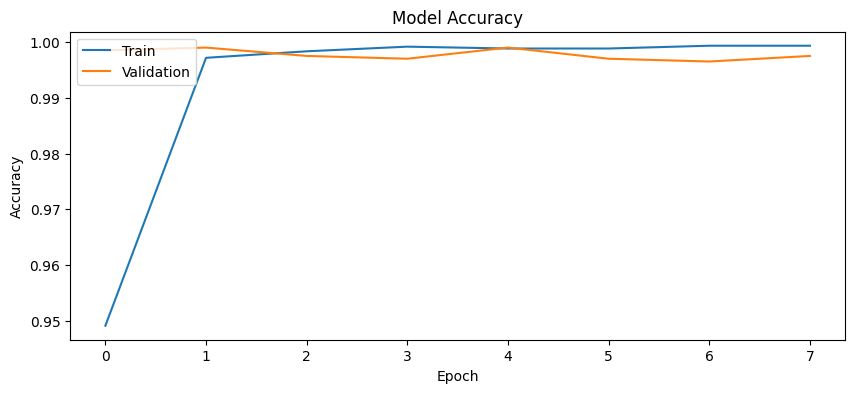

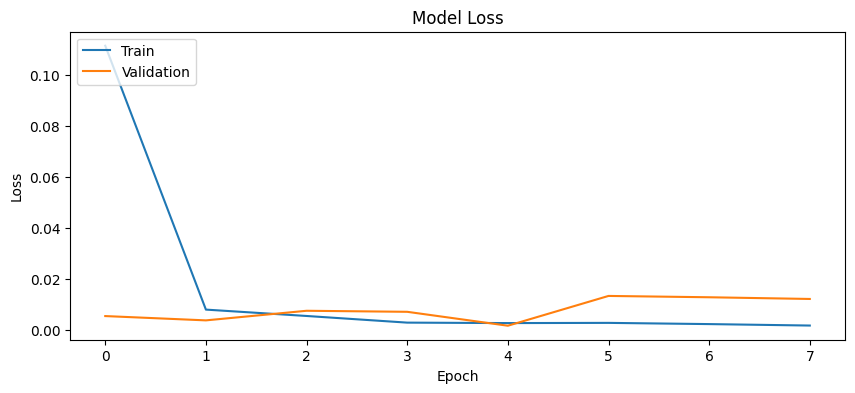

In [12]:
# Plot for training and validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot for training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
test_generator = test_datagen.flow_from_directory(
            '/content/drive/MyDrive/Group_Project_Data/Valid',
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=32,
        class_mode='binary')




results = model.evaluate(test_generator)
print('Test loss: {:.3f}, Test accuracy: {:.3f}'.format(results[0], results[1]))




test_labels = test_generator.classes

Found 2000 images belonging to 2 classes.
63/63 [==============================] - 3s 53ms/step - loss: 0.0018 - accuracy: 0.9990
Test loss: 0.002, Test accuracy: 0.999


In [17]:
# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_ = np.argmax(y_pred, axis=1)

# Select correctly classified and misclassified indices for each class
correct_indices = np.where(y_pred_ == test_labels)[0]
incorrect_indices = np.where(y_pred_ != test_labels)[0]

# Load the test images
test_images = []
for file_path in test_generator.filepaths:
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))
    test_images.append(img)
test_images = np.array(test_images)

63/63 [==============================] - 3s 47ms/step


Correctly classified:


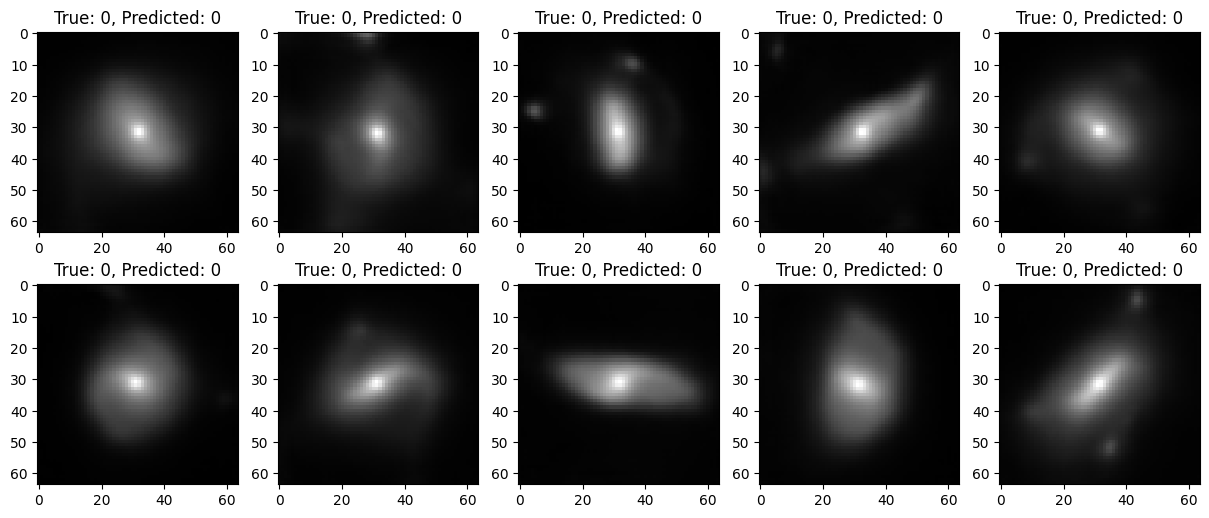

In [18]:
# Display some correctly classified images
print('Correctly classified:')
if len(correct_indices) > 0:
    fig, axes = plt.subplots(nrows=2, ncols=min(5, len(correct_indices)), figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        if i < len(correct_indices):
            img_idx = correct_indices[i]
            ax.imshow(test_images[img_idx], cmap='gray')
            ax.set_title(f"True: {test_labels[img_idx]}, Predicted: {y_pred_[img_idx]}")
        else:
            ax.axis('off')
    plt.show()
else:
    print('No images were correctly classified.')

Incorrectly classified:


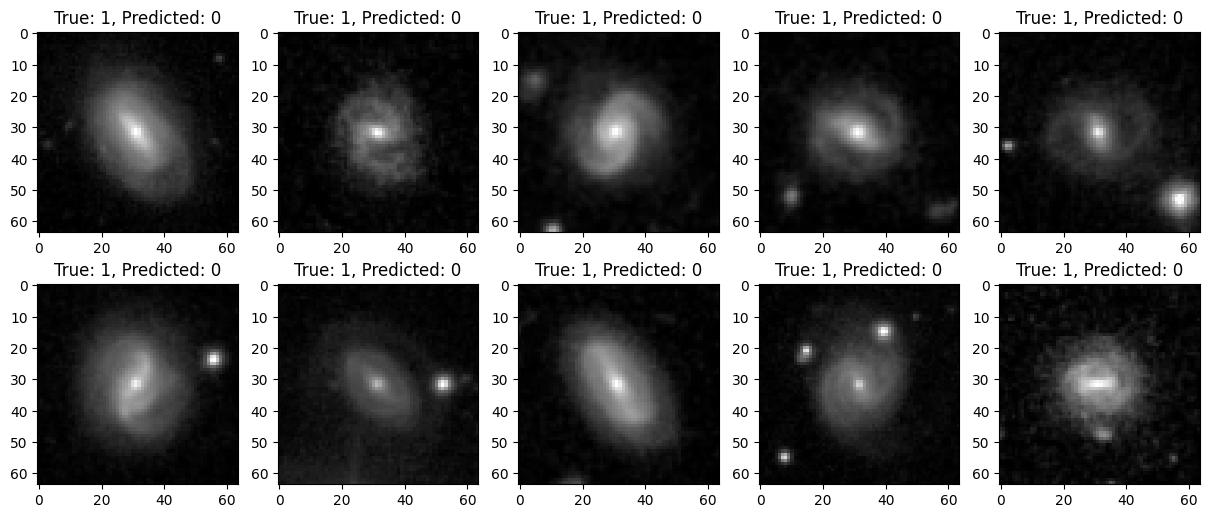

In [19]:
# Display some incorrectly classified images
print('Incorrectly classified:')
if len(incorrect_indices) > 0:
    fig, axes = plt.subplots(nrows=2, ncols=min(5, len(incorrect_indices)), figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        if i < len(incorrect_indices):
            img_idx = incorrect_indices[i]
            ax.imshow(test_images[img_idx], cmap='gray')
            ax.set_title(f"True: {test_labels[img_idx]}, Predicted: {y_pred_[img_idx]}")
        else:
            ax.axis('off')
    plt.show()
else:
    print('No images were incorrectly classified.')




conf_matrix = confusion_matrix(test_labels, y_pred_)


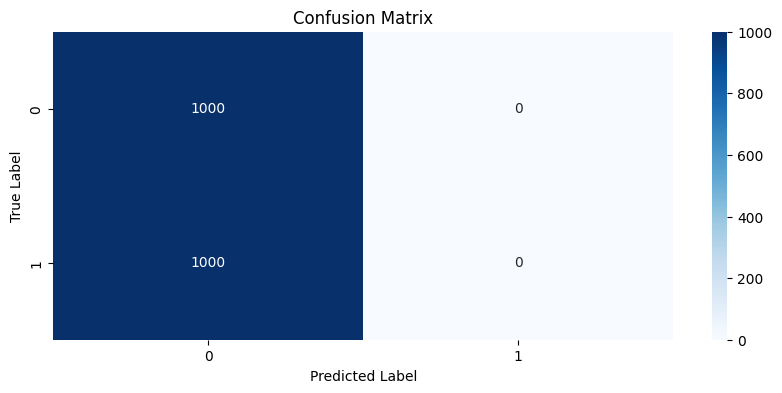

In [20]:
# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [21]:
# Create a directory to save the model if it doesn't exist
if not os.path.exists('Group_X_Model_Trained'):
    os.makedirs('Group_X_Model_Trained')

In [22]:
# Save the model in the "models" directory
model.save('/content/Group_X_Model_Trained/our_model.h5')

In [23]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/Group_X_Model_Trained/our_model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

In [24]:
# zip the model
!zip -r /content/Group_X_Model_Trained/our_model.h5.zip /content/Group_23_Model_Trained/our_model.h5

	zip warning: name not matched: /content/Group_23_Model_Trained/our_model.h5

zip error: Nothing to do! (try: zip -r /content/Group_X_Model_Trained/our_model.h5.zip . -i /content/Group_23_Model_Trained/our_model.h5)
